<a href="https://colab.research.google.com/github/Marco-ML/Data-Science/blob/main/Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto:  Previsão de Churn no setor bancário

## O que é churn?

Churn é a ação de um cliente deixar um produto ou serviço em um período de tempo, esse processo faz com que a empresa perca clientes e não consiga ter uma relação duradoura com seus clientes.

## Quais os problemas gerados pelo churn?

Quando o cliente sai sem dar avisos a empresa tem grande probabilidade do cliente estar infeliz com o serviço, com isso a empresa poderá sofrer com reclamações públicas na internet sobre seus serviços, desse modo evitando o ganho de novos clientes.

## Solução:

Minimizar o churn é uma estratégia importante para a empresa ter uma relação duradoura com seus clientes e evitar a diminuição do ganho de novos clientes.

## Abordagem do problema:

Será usado modelos supervisionados de machine learning para classificação de churn, ou seja, classificar dadas as caracterísitcas de um cliente se esse cliente irá deixar os serviços do banco em um determinado período de tempo.

## Informações do banco do dados:

10.000 linhas e 18 colunas, sendo 16 colunas que não representam identificação.

Link de acesso ao banco de dados:

https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

O banco de dados foi retirado de uma instituição ficticia denominada como "Anonymous Multinational bank".

O banco de dados não tem valores faltantes, com isso as 10.000 linhas podem ser usadas.

## Dicionário de dados:

| Nome da coluna | Informação da coluna | Tipo dos valores | Valores |
|----------------|----------------------|------------------|---------|
|RowNumber|Índice do banco de dados|Inteiro|0 até 9.999|
|CustomerId|Valores randomicos que representam a identificação do cliente|Inteiro|15565701 até 15815690|
|Surname|Sobrenome do cliente|Texto|Letras|
|CreditScore|Score de crédito de um cliente|Inteiro|350 até 850|
|Geography|Local de moradia do cliente|Texto|Letras|
|Gender|Gênero do cliente|Texto|Letras|
|Age|Idade do cliente|Inteiro|18 até 92|
|Tenure|Quantidade de anos que a pessoa é cliente do banco|Inteiro|0 até 10|
|Balance|Quantidade de dinheiro do cliente no banco|Ponto flutuante|0 até 250.898,09|
|NumOfProducts|Quantidade de produtos que o cliente comprou|Inteiro|1 até 4|
|HasCrCard|Representa se o cliente tem cartão de crédito|Booleano|0 e 1|
|IsActiveMember|Representa se o cliente é ativo no Banco|Booleano|0 e 1|
|EstimatedSalary|Salário estimado do cliente|Ponto flutuante|11,58 até 199.992,48|
|Exited|Representa se o cliente deixou o Banco|Booleano|0 e 1|
|Complain|Representa se o cliente já reclamou para o banco|Booleano|0 e 1|
|Satisfaction Score|Índice de satisfação do cliente|Inteiro|1 até 5|
|Card Type|Tipo do cartão de crédito do cliente|Texto|Letras|
|Point Earned|Pontos acumulados pelo cliente com o uso do cartão de crédito|Inteiro|119 até 1000|


## Perguntas:

A quantidade de tempo que a pessoa é cliente do banco influencía na permanencia deste cliente?

O fato do cliente já ter aberto reclamação do banco influencía para o cliente cancelar sua conta?

O tipo do cartão do cliente junto com a quantidade de pontos acumulados no cartão influencia na permanencia do cliente?

O score de crédito do cliente influencia para o cliente cancelar a conta?

Ter um índice de satisfação do cliente alto representa uma alta quantidade de dinheiro na conta?

O tipo do cartão influencia no acumulo de pontos e na quantidade de produtos comprados? Ou seja, compra mais produtos ou menos?

## Análise Técnica:

Exited: 1, Not Exited: 0

Classificar um cliente como "Exited" quando "Not Exited" é melhor do que classificar um cliente "Not Exited" quando "Exited", tendo em vista que quando um cliente deixa de usar os serviços do banco, há uma perda financeira direta e além disso, caso tenha deixado por insatisfação, então há perda financeira indireta pela possível reclamação em sites de reclamação, fazendo com que outros clientes não utilizem os serviços do banco.

Adotando "Exited" como positivo e "Not Exited" como negativo, então para mitigar classificar "Not Exited" quando "Exited" deve-se reduzir os falsos positivos, com isso uma das métricas que recebrão maior peso em análise será a precisão., pois $Precisão = \frac{VP}{VP + FP}$.

## Banco de dados:

Importando o banco de dados diretamente do site kaggle.com utilizando a API do prórprio kaggle seguindo diretório de API "kaggle datasets download -d radheshyamkollipara/bank-customer-churn".

Para acessar o banco de dados é necessário pegar um token no site kaggle.com logado em sua conta, o arquivo que contém o token vem no formato json, com o nome "kaggle.json", para acessar é necessário selecionar o arquivo na caixa de upload que aparecerá ao executar á célula de código abaixo.

In [ ]:
#!pip install kaggle; #caso seja necessário atualizar a biblioteca no google colab

from google.colab import files
files.upload() #enviar o arquivo kaggle.json

#antes de importar o dataset nós iremos provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
!chmod 600 ~/.kaggle/kaggle.json

#Aceitar o acesso e copiar o endereço da API para o download do dataset
!kaggle datasets download -d radheshyamkollipara/bank-customer-churn

#Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

Saving kaggle.json to kaggle (1).json
  0% 0.00/307k [00:00<?, ?B/s]
100% 307k/307k [00:00<00:00, 110MB/s]
Archive:  bank-customer-churn.zip
replace Customer-Churn-Records.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Customer-Churn-Records.csv  


### Importando as bibliotecas necessárias para ler o banco de dados.

In [ ]:
import pandas as pd

In [ ]:
db = pd.read_csv('Customer-Churn-Records.csv', dtype = {'HasCrCard' : "category", 'IsActiveMember' : "category", 'Exited' : "category", 'Complain' : "category", 'Geography' : 'category', 'Gender' : 'category', 'Card Type' : 'category'})

### Sintese dos dados

In [ ]:
db.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Excluindo atributos de identificação e atributos irrelevantes para previsão.

In [ ]:
db.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

### Pegando as informações do tipo dos elementos contídos em cada coluna do banco de dados.

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CreditScore         10000 non-null  int64   
 1   Geography           10000 non-null  category
 2   Gender              10000 non-null  category
 3   Age                 10000 non-null  int64   
 4   Tenure              10000 non-null  int64   
 5   Balance             10000 non-null  float64 
 6   NumOfProducts       10000 non-null  int64   
 7   HasCrCard           10000 non-null  category
 8   IsActiveMember      10000 non-null  category
 9   EstimatedSalary     10000 non-null  float64 
 10  Exited              10000 non-null  category
 11  Complain            10000 non-null  category
 12  Satisfaction Score  10000 non-null  int64   
 13  Card Type           10000 non-null  category
 14  Point Earned        10000 non-null  int64   
dtypes: category(7), float64(2), int64(6)


### Analisando o comportamento geral dos atributos numéricos

In [ ]:
db.select_dtypes(float and int).describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.5,96.7,350.0,584.0,652.0,718.0,850.0
Age,10000.0,38.9,10.5,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,2.9,0.0,3.0,5.0,7.0,10.0
NumOfProducts,10000.0,1.5,0.6,1.0,1.0,1.0,2.0,4.0
Satisfaction Score,10000.0,3.0,1.4,1.0,2.0,3.0,4.0,5.0
Point Earned,10000.0,606.5,225.9,119.0,410.0,605.0,801.0,1000.0


Não foram encontrados dados diferentes do esperado para as colunas de tipo numérico, com isso não é necessário tratar essas colunas.

### Analisando a distribuição dos valores de tipo categórico.

In [ ]:
for i in db.select_dtypes("category").columns:
  print(db[i].value_counts(normalize = True)) #Retorna a contagem em porcentagem.
  print('-'*40)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64
----------------------------------------
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64
----------------------------------------
1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64
----------------------------------------
1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64
----------------------------------------
0    0.7962
1    0.2038
Name: Exited, dtype: float64
----------------------------------------
0    0.7956
1    0.2044
Name: Complain, dtype: float64
----------------------------------------
DIAMOND     0.2507
GOLD        0.2502
SILVER      0.2496
PLATINUM    0.2495
Name: Card Type, dtype: float64
----------------------------------------


Não foram encontrados valores fora do esperaod para as colunas que possuem valoes do tipo objeto, com isso não é necessário tratar essas colunas.

### Analisando a quantidade de valores faltantes no banco de dados.

In [ ]:
db.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

O banco de dados não contém valores faltantes ou nulos, com isso, não será necessário utilizar esse tipo de tratamento nesse banco de dados.

### Banco de dados após o tratamento

In [ ]:
db

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## Salvando o banco de dados limpo em um arquivo csv

In [ ]:
db.to_csv('Customer-Churn-Records-cleaned.csv', index = False)

In [ ]:
db = pd.read_csv('Customer-Churn-Records-cleaned.csv',  dtype = {'HasCrCard' : "category", 'IsActiveMember' : "category", 'Exited' : "int", 'Complain' : "category", 'Geography' : 'category', 'Gender' : 'category', 'Card Type' : 'category'})

# Análise Exploratória - Respondendo as perguntas:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## A quantidade de tempo que a pessoa é cliente do banco influencía na permanencia deste cliente? O fato do cliente já ter aberto reclamação do banco influencía para o cliente cancelar sua conta?

In [ ]:
def anotacao_porcentagem_countplot(ax):
    '''
      Função que anota a porcentagem da relação entre os gráficos de barra, onde o conjunto de barras representa 100%.

      Recebe:
        ax: count plot gerado a partir da biblioteca seaborn.

      Retorna:
        Essa função não tem retorno.
    '''
    all_heights = [[bar.get_height() for bar in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, bar in enumerate(bars):
            total = sum(grupo_x[i] for grupo_x in all_heights)
            percentage = f'{(100 * bar.get_height() / total) :.1f}%'
            ax.annotate(percentage, (bar.get_x() + bar.get_width() / 2, bar.get_height()), size=11, ha='center', va='bottom')

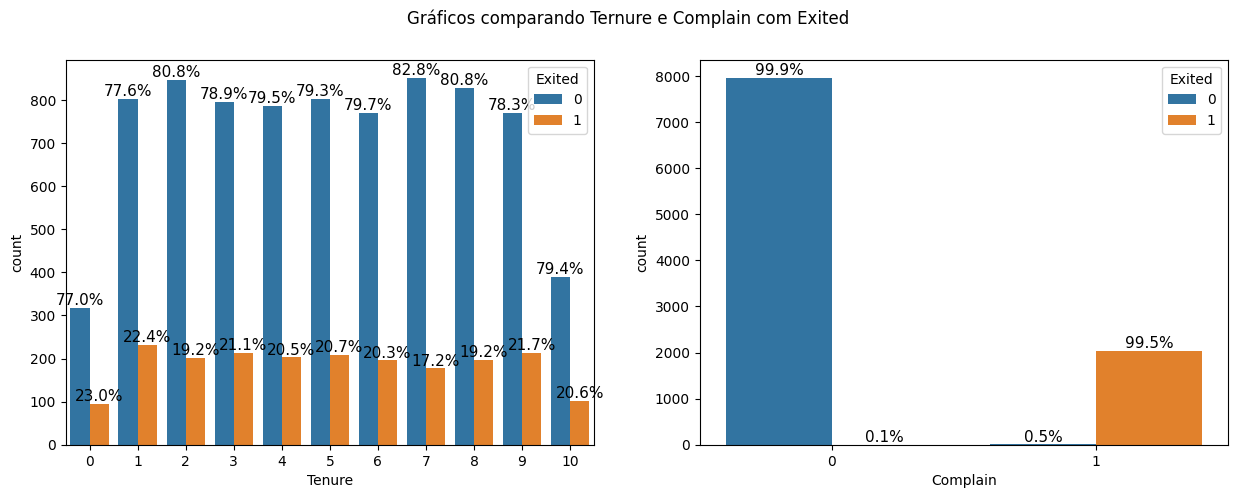

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Gráficos comparando Ternure e Complain com Exited')
ax = sns.countplot(ax = axes[0], data = db, x = 'Tenure', hue = 'Exited')
anotacao_porcentagem_countplot(ax)
ax = sns.countplot(ax = axes[1], data = db, x = 'Complain', hue = 'Exited')
anotacao_porcentagem_countplot(ax)

Não foi possível encontrar alguma correlação entre o tempo de permanencia do cliente ao banco com o cancelamento da conta, isso porque todas as relações de "Tenure" com "Exited" são semelhantes, tendo erro máximo de 5,8% para Exited = 0 e 2,4% para Exited = 1.

O fato do cliente ter aberto reclamação tem relação direta com o cancelamento da conta, tendo 99,9% dos clientes sem reclamação aberta não tendo cancelado a conta e 99,5% dos clientes que reclamaram tendo cancelado a conta.

## O tipo do cartão do cliente e a quantidade de pontos acumulados no cartão influencia na permanencia do cliente?

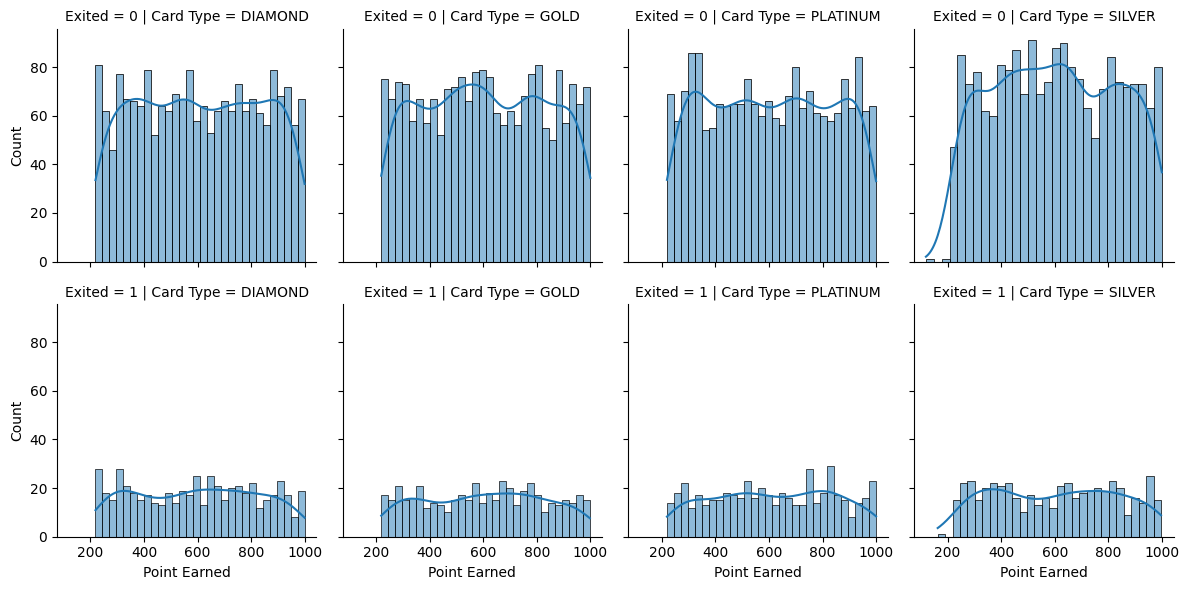

In [ ]:
grid = sns.FacetGrid(data = db, row = 'Exited', col = 'Card Type')
grid.map(sns.histplot, 'Point Earned', bins = 30, kde = True, ax = axes[0])

Não é possível encontrar alguma correlação entre o tipo de cartão e o ponto acumulado., pois as distribuições estão com comportamento geral bem próximos.

## O score de crédito do cliente influencia para o cliente cancelar a conta?

<Axes: xlabel='Exited', ylabel='CreditScore'>

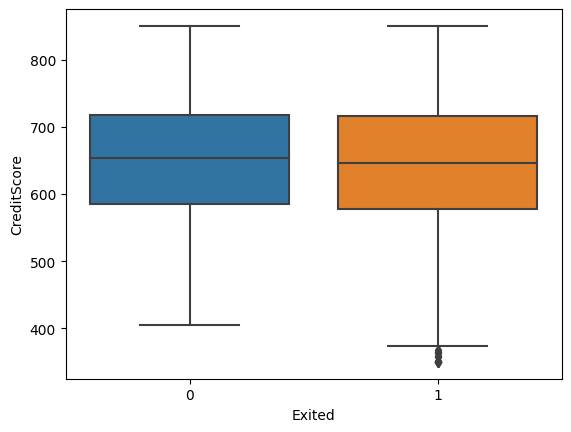

In [ ]:
sns.boxplot(data = db, y = 'CreditScore', x = 'Exited')

Não foi possível encontrar relação entre o Score do cliente com o cancelamento do serviço, tendo em vista que a distribuição é muito semelhante.

## Ter um índice de satisfação do cliente alto representa uma alta quantidade de dinheiro na conta?

<Axes: xlabel='Satisfaction Score', ylabel='Balance'>

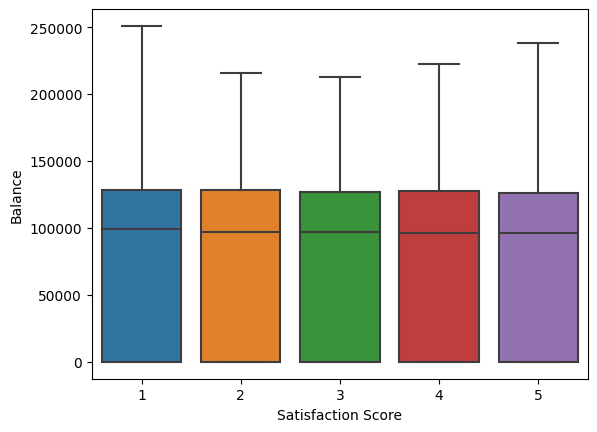

In [ ]:
sns.boxplot(data=db, x = 'Satisfaction Score', y= 'Balance')

Não foi possível encontrar relação entre ter mais dinheiro na conta e ter maior satisfação do cliente.

### O tipo do cartão influencia no acumulo de pontos e na quantidade de produtos comprados? Ou seja, compra mais produtos ou menos?

<Axes: xlabel='Card Type', ylabel='Point Earned'>

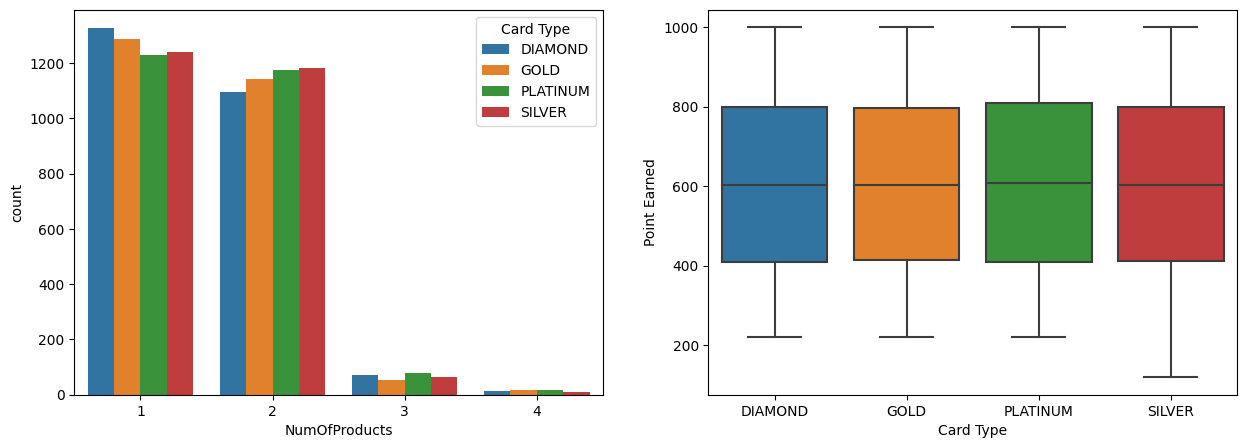

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5)) # Uma linha e duas colunas.
ax1 = sns.countplot(ax = ax[0], data = db, x = 'NumOfProducts', hue = 'Card Type')
sns.boxplot(ax = ax[1], data=db, x = 'Card Type', y= 'Point Earned')

A proporção entre o número de produtos e o tipo de cartão é são muito próximas, com isso não é possível encontrar relação entre essas duas variáveis.

## A quantidade de tempo que a pessoa é cliente do banco influencia no cancelamento de sua conta?

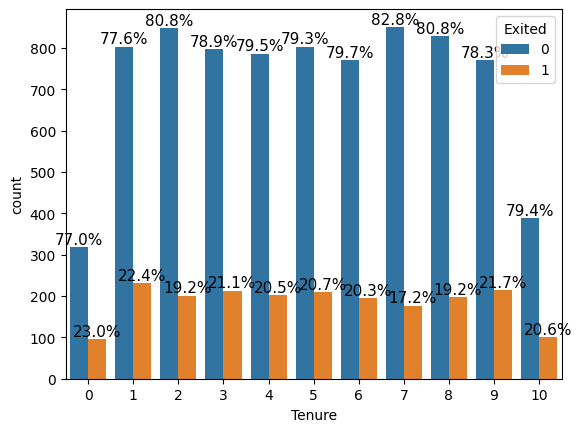

In [ ]:
ax = sns.countplot(data = db, x = 'Tenure', hue = 'Exited')
anotacao_porcentagem_countplot(ax)

A proporção para o tempo que o cliente é cliente do banco é a mesma para todas as categorias comparadas com o target, com isso não é possível encontrar relação.

# Engenharia de Atributos

## Importando bibliotecas responsáveis pela parte de pré-processamento

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
db

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
db.corr() #Matriz de correlação.

<ipython-input-77-fead751365f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  db.corr() #Matriz de correlação.


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384,-0.026771,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.285296,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.013656,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797,0.118577,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204,-0.047611,-0.011394,-0.015330
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000,0.012490,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,0.012490,1.000000,-0.005849,-0.004628
Satisfaction Score,-0.012599,-0.000876,0.008663,-0.002588,-0.011394,-0.013747,-0.005849,1.000000,-0.014400
Point Earned,0.000077,0.002222,-0.010196,0.014608,-0.015330,-0.001515,-0.004628,-0.014400,1.000000


<ipython-input-78-061ee0c0b7ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db.corr(), annot = True) #Heatmap


<Axes: >

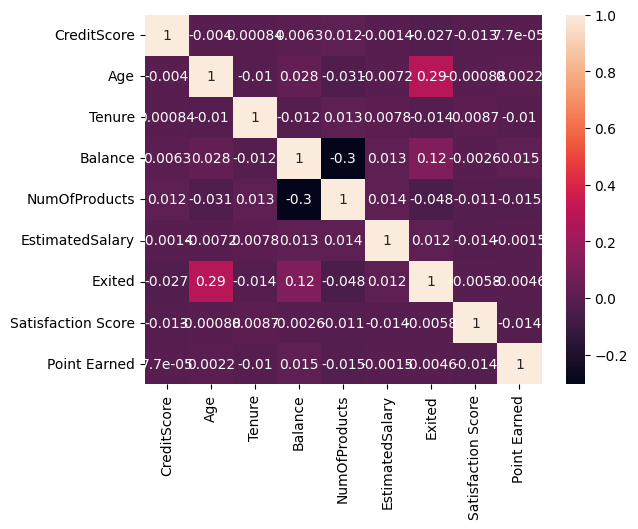

In [ ]:
sns.heatmap(db.corr(), annot = True) #Heatmap

Como não foram encontradas altas correlações entre as variáveis e o banco de dados têm poucas colunas utilizáveis(15), então não será utiizado métodos de seleão de atributos.

In [ ]:
y = db['Exited']
x = db.drop('Exited', axis = 1).copy()

In [ ]:
x_dummie = pd.get_dummies(x, drop_first = True).copy() #OnehotEncorde retirando a primeira ocorrência.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_dummie, y,
                                                    test_size=.2, random_state = 42)

Como tem muitas inoformações com escalas diferentes, exemplo, número de produtos, que está na casa da unidade, salário que está na casa dos milhares e valores booleanos que variam entre 0 e 1, então é necessário padronizar e normalizar os dados, dessa forma evitando uma atribuição de peso muito diferente por parte do modelo.

In [ ]:
padr = StandardScaler() #Normalizando os dados.

X_train_padr = pd.DataFrame(padr.fit_transform(X_train.to_numpy()),
                            index=X_train.index,
                            columns=X_train.columns)

X_test_padr = pd.DataFrame(padr.transform(X_test.to_numpy()),
                           index=X_test.index,
                           columns=X_test.columns)

# Não da para ser usado em variáveis categóricas, pois (x-u)/sigma.

In [ ]:
X_train_padr

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1,Complain_1,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,1.367670,-0.720010,-0.430193,-0.579467,-0.576388,0.913248,0.649203,0.974817,-0.509942,-0.577158,-0.580237,-0.573886
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,1.661254,0.704342,1.565908,1.725723,-0.576388,0.913248,0.649203,0.974817,-0.509942,-0.577158,1.723434,-0.573886
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,-0.252807,0.704342,-1.243749,-0.579467,1.734942,0.913248,0.649203,-1.025834,1.961007,-0.577158,-0.580237,1.742506
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.915393,-0.720010,-0.176791,-0.579467,-0.576388,-1.094993,0.649203,-1.025834,1.961007,-0.577158,-0.580237,1.742506
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.059600,-0.007834,0.534515,-0.579467,-0.576388,0.913248,-1.540351,-1.025834,1.961007,-0.577158,1.723434,-0.573886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.207474,1.435808,1.039728,-0.102301,-0.916688,-0.539860,-0.007834,-0.167899,-0.579467,-0.576388,0.913248,0.649203,0.974817,-0.509942,-0.577158,-0.580237,1.742506
5191,0.314989,1.816097,-1.389442,-1.218471,-0.916688,-1.733882,0.704342,0.454493,-0.579467,-0.576388,-1.094993,0.649203,0.974817,-0.509942,-0.577158,1.723434,-0.573886
5390,0.865009,-0.085351,-1.389442,-1.218471,2.533560,-0.142765,1.416518,0.316678,-0.579467,-0.576388,-1.094993,-1.540351,-1.025834,1.961007,-0.577158,-0.580237,1.742506
860,0.159323,0.390011,1.039728,1.827259,-0.916688,-0.050826,-0.007834,0.325569,-0.579467,-0.576388,0.913248,0.649203,-1.025834,1.961007,-0.577158,-0.580237,-0.573886


# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Métricas de avaliação dos modelos

from sklearn.metrics import confusion_matrix, roc_curve, classification_report, accuracy_score, roc_auc_score, precision_score

In [ ]:
pipe = Pipeline([('scaledLR', (Pipeline([('LR' , LogisticRegression(class_weight = 'balanced', random_state = 42))]))),
                ('scaledDT', (Pipeline([('DT' , DecisionTreeClassifier(class_weight = 'balanced', random_state = 42))]))),
                ('scaledRF', (Pipeline([('RF' , RandomForestClassifier(class_weight = 'balanced', random_state = 42))])))])

## Regressão logística

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'newton-cholesky','‘sag', 'saga']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
dual = [False, True]
fit_intercept = [False, True]

hiperpars = {"LR__solver": solvers,
             "LR__penalty":penalty,
             "LR__C":c_values}

grid_lr = GridSearchCV(estimator=pipe[0],
                      param_grid=hiperpars,
                      scoring="accuracy",
                      n_jobs=-1,
                      refit=True,
                      cv=5,
                      verbose=0,
                      return_train_score=True);

## Árvore de Decisão

In [ ]:
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']

hiperpars = {"DT__criterion": criterion,
             "DT__splitter":splitter,}

grid_dt = GridSearchCV(estimator=pipe[1],
                      param_grid=hiperpars,
                      scoring="accuracy",
                      n_jobs=-1,
                      refit=True,
                      cv=5,
                      verbose=0,
                      return_train_score=True);

## Random Forest

In [ ]:
criterion = ['gini', 'entropy', 'log_loss']
bootstrap = [False, True]


hiperpars = {"RF__criterion": criterion,
             "RF__bootstrap":bootstrap,}

grid_rf = GridSearchCV(estimator=pipe[2],
                      param_grid=hiperpars,
                      scoring="accuracy",
                      n_jobs=-1,
                      refit=True,
                      cv=5,
                      verbose=0,
                      return_train_score=True);

In [ ]:
grids = [grid_lr, grid_dt, grid_rf]

In [ ]:
for pipe in grids:
    pipe.fit(X_train_padr,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
275 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

In [ ]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest'}

for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test_padr,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

Logistic Regression Test Accuracy: 0.999
Logistic Regression Best Params: {'LR__C': 100, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.9975
Decision Trees Best Params: {'DT__criterion': 'entropy', 'DT__splitter': 'best'}
Random Forest Test Accuracy: 0.999
Random Forest Best Params: {'RF__bootstrap': False, 'RF__criterion': 'gini'}


In [ ]:
y_pred = pipe.predict(X_test_padr)

In [ ]:
print('Acurácia: ', accuracy_score(y_test, y_pred))
print('Precisão: ', precision_score(y_test, y_pred))

Acurácia:  0.999
Precisão:  0.9974554707379135


In [ ]:
pipe.best_params_

{'RF__bootstrap': False, 'RF__criterion': 'gini'}

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<Axes: xlabel='Previsto', ylabel='Atual'>

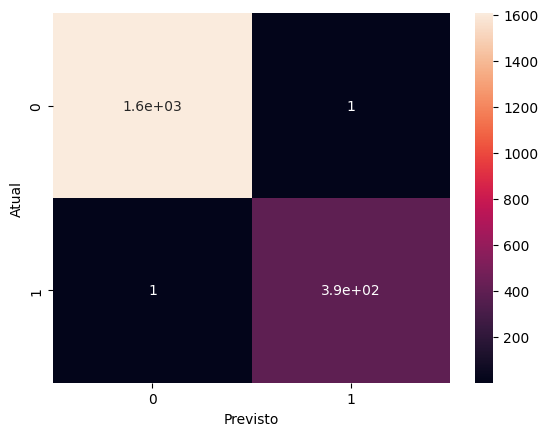

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Atual'], colnames=['Previsto'])
sns.heatmap(confusion_matrix, annot= True,)

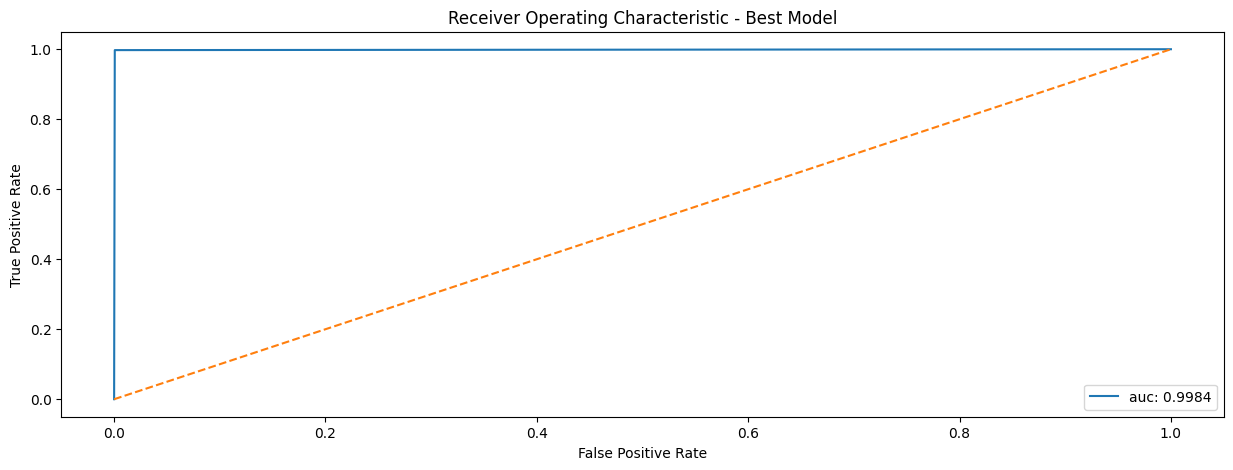

In [ ]:
auc = roc_auc_score(y_test, y_pred)
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
plt.subplots(1, figsize=(15,5))
plt.title('Receiver Operating Characteristic - Best Model')
plt.plot(false_positive_rate1, true_positive_rate1, label = f'auc: {auc:.4f}')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
criterion = ['gini', 'entropy', 'log_loss']
bootstrap = [False, True]


hiperpars = {"criterion": criterion,
             "bootstrap":bootstrap,}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(class_weight = 'balanced'),
                      param_grid=hiperpars,
                      scoring="accuracy",
                      n_jobs=-1,
                      refit=True,
                      cv=5,
                      verbose=0,
                      return_train_score=True);

In [ ]:
grid_rf.fit(X_train_padr, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy', 'log_loss']},
             return_train_score=True, scoring='accuracy')

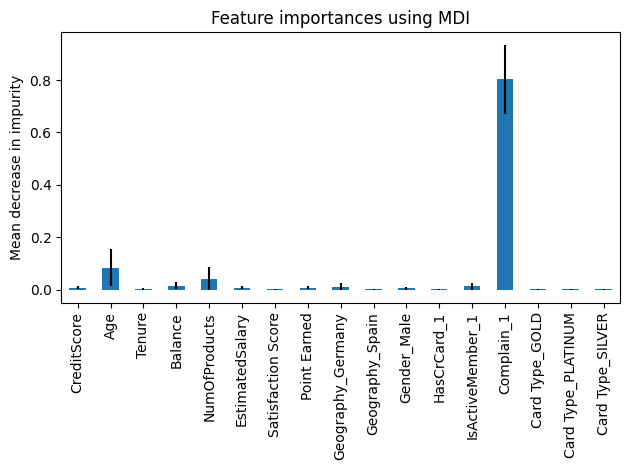

In [ ]:
feature_importance = grid_rf.best_estimator_.feature_importances_
feature_names = X_train_padr.columns.to_list()

#Mean decrease in impurity or Gini Importance
feature_importances = pd.Series(feature_importance, index=feature_names)
std = np.std([tree.feature_importances_ for tree in grid_rf.best_estimator_], axis=0)

fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Retiando a coluna "Complain"

In [ ]:
db = pd.read_csv('Customer-Churn-Records-cleaned.csv',  dtype = {'HasCrCard' : "category", 'IsActiveMember' : "category", 'Exited' : "int", 'Complain' : "category", 'Geography' : 'category', 'Gender' : 'category', 'Card Type' : 'category'})
db.drop('Complain', axis = 1, inplace = True)
y = db['Exited']
x = db.drop('Exited', axis = 1).copy()
x_dummie = pd.get_dummies(x, drop_first = True).copy()
X_train, X_test, y_train, y_test = train_test_split(x_dummie, y,
                                                    test_size=.2, random_state = 42)
padr = StandardScaler() #Normalizando os dados.

X_train_padr = pd.DataFrame(padr.fit_transform(X_train.to_numpy()),
                            index=X_train.index,
                            columns=X_train.columns)

X_test_padr = pd.DataFrame(padr.transform(X_test.to_numpy()),
                           index=X_test.index,
                           columns=X_test.columns)

# Não da para ser usado em variáveis categóricas, pois (x-u)/sigma.

for pipe in grids:
    pipe.fit(X_train_padr,y_train)

y_pred = pipe.predict(X_test_padr)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
275 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

In [ ]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest'}

for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test_padr,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

Logistic Regression Test Accuracy: 0.7295
Logistic Regression Best Params: {'LR__C': 0.01, 'LR__penalty': 'l1', 'LR__solver': 'saga'}
Decision Trees Test Accuracy: 0.8055
Decision Trees Best Params: {'DT__criterion': 'entropy', 'DT__splitter': 'best'}
Random Forest Test Accuracy: 0.8645
Random Forest Best Params: {'RF__bootstrap': True, 'RF__criterion': 'entropy'}


In [ ]:
pipe.best_params_

{'RF__bootstrap': True, 'RF__criterion': 'entropy'}

In [ ]:
print('Acurácia: ', accuracy_score(y_test, y_pred))
print('Precisão: ', precision_score(y_test, y_pred))

Acurácia:  0.8645
Precisão:  0.7652173913043478


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



<Axes: xlabel='Previsto', ylabel='Atual'>

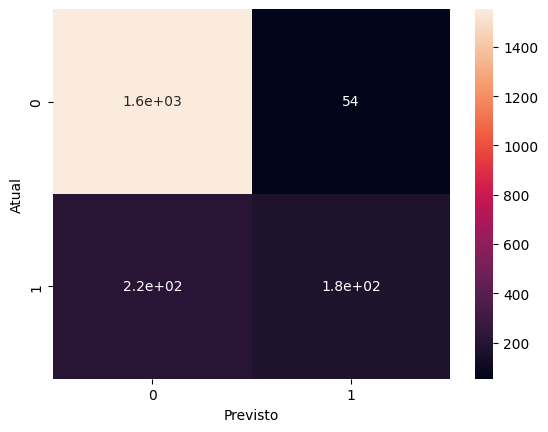

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Atual'], colnames=['Previsto'])
sns.heatmap(confusion_matrix, annot= True,)

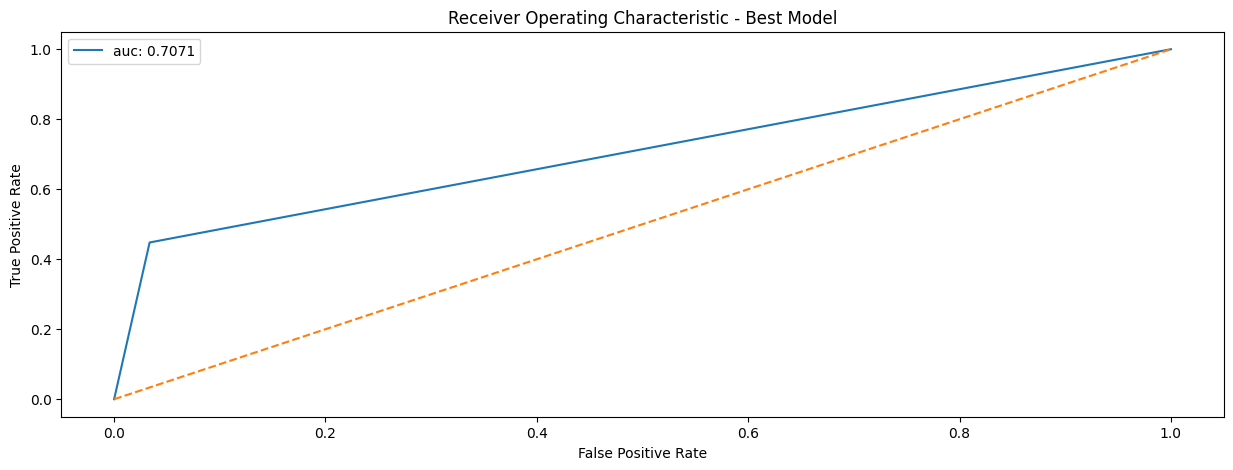

In [ ]:
auc = roc_auc_score(y_test, y_pred)
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
plt.subplots(1, figsize=(15,5))
plt.title('Receiver Operating Characteristic - Best Model')
plt.plot(false_positive_rate1, true_positive_rate1, label = f'auc: {auc:.4f}')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Conclusão

O processo de ciência de dados é constituido pelo processo de analise exploratória, pré-processamento, desenvolvimento do modelo e validação do modelo.

No processo de análise exploratória foi possível identificar uma forte influencia da variável "complain" com a variável target("Exited"), isso foi reforçado ao analisar a "feature importance" das variáveis para o modelo selecionado pelo cross-validation.

Como os dados tem origem de dimensionalidade diferentes, ou seja, alguns dados tem intevalo na casa da unidade enquanto outros tem intervalo na casa dos milhares, então foi usado também o processo da padronização e normalização dos dados, sendo para isso utilizado o método "StandardScaler".

Foram utilizados 3 modelos supervisionados para classificação, sendo eles, "Logistic Regression", "Decision Tree" e "Random Forest".

O modelo que teve melhor performance utilizando corss-validation foi a "Random Forest" com "bootstrap = True" e "criterion = entropy", tendo acurácia de 86,45% e precisão de 76,52% para os dados de teste.


